In [ ]:
# Aula 6: <br>Classificação - Knn, Regressão Logistica, Naive Bayes.

In [ ]:
Francisco Aparecido Rodrigues, francisco@icmc.usp.br.<br>
Universidade de São Paulo, São Carlos, Brasil.<br>
Copyright (c) 2020.

In [ ]:
Nessa aula vamos aprender sobre três métodos de classificação, isto é, o método dos k-vizinhos mais próximos (knn), regressão logística e naive Bayes. Cada um desses métodos é baseado em diferentes conceitos, tais como distância entre atributos (knn), regressão e teoria das probabilidades.

In [ ]:
Vamos inicialmente ler os dados:

In [22]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
random.seed(42) # define the seed (important to reproduce the results)

In [27]:
#data = pd.read_csv('data/vertebralcolumn-3C.csv', header=(0))
data = pd.read_csv('data/winequality-red.csv', header=(0))

#remove NaN
data = data.dropna(axis='rows')

# armazena os nomes das classes
classes = np.array(pd.unique(data[data.columns[-1]]), dtype=str)  

nrow, ncol = data.shape
print(f"Matriz de atributos:\n  Número de linhas: {nrow}\n  Número de colunas: {ncol}\n")

attributes = list(data.columns)
print(f"Atributos:\n{attributes}")

data.head(10)

Matriz de atributos:
  Número de linhas: 1599
  Número de colunas: 12

Atributos:
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [ ]:
Vamos construir as variáveis $X$ e $y$, sendo que o processo de classificação se resume em estimar a função $f$ na relação $y = f(X) + \epsilon$, onde $\epsilon$ é o erro, que tem distribuição normal com média igual a zero e variância $\sigma^2$.

In [ ]:
Convertemos os dados para o formato Numpy para facilitar a sua manipulação. 

In [28]:
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

In [ ]:
Vamos normalizar os dados, de modo a evitar o efeito da escala dos atributos.

In [29]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [30]:
print('Dados transformados:')
print('Media: ', np.mean(X, axis = 0))
print('Desvio Padrao:', np.std(X, axis = 0))

Dados transformados:
Media:  [ 3.55493551e-16  1.73303106e-16 -8.88733878e-17 -1.24422743e-16
  2.13296131e-16 -6.22113715e-17  4.44366939e-17 -3.47317200e-14
  2.86172309e-15  6.75437748e-16  1.06648065e-16]
Desvio Padrao: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
Para treinar o classificador, precisamos definir o conjunto de teste e treinamento.

In [31]:
from sklearn.model_selection import train_test_split
p = 0.2 # fraction of elements in the test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p)

In [ ]:
A partir desse conjunto de dados, podemos realizar a classificação.

In [ ]:
## k-vizinhos

In [ ]:
Para realizar a classificação, vamos usar a biblioteca scikit-learn (https://scikit-learn.org). É possível implementar o método usando métricas diferentes da Euclidiana, como as que podem ser vistas em: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html

In [ ]:
Vamos ajustar o modelo. Inicialmente, vamos considerar o método hold-out para selecionar o conjunto de teste e treinamento, que seleciona uma fração p de elementos para o conjunto de teste e (1-p), para treinamento. A seleção do modelo será feita mais adiante usando validação cruzada.

In [ ]:
Relizando a classificação pelo método dos k-vizinhos:

In [32]:
from sklearn.neighbors import KNeighborsClassifier
k = 5 # numero de vizinhos
# ajusta o modelo k-vizinhos
model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
model.fit(x_train,y_train)
# faz a predição no conjunto de teste
y_pred = model.predict(x_test) 

In [ ]:
O erro na classificação pode ser quantificado pela medida de acurácia.

In [36]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print(f'Accuracy: {100*score:.2f}%')

Accuracy: 57.50%


In [ ]:
Notem quem o valor da acurácia depende do número de vizinhos $k$. Podemos selecionar o melhor valor de $k$ usando validação cruzada. 

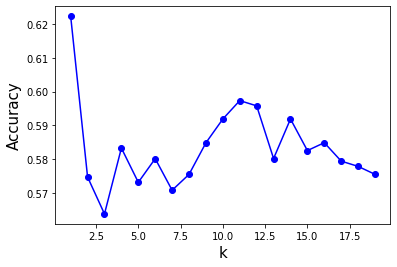

Melhor k: 1


In [35]:
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier

nkf = 5 #number of folds
vk = [] # armazena os valores de k
vscore = []
for k in range(1, 20):
    model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    # realiza a validação cruzada
    cv = cross_validate(model, x_train, y_train, cv=nkf)
    #print('k:', k, 'accurace:', cv['test_score'].mean())
    vscore.append(cv['test_score'].mean()) 
    vk.append(k)

plt.plot(vk, vscore, '-bo')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.show(True)
best_k = np.argmax(vscore)+1
print('Melhor k:', best_k)

In [ ]:
Usando todo o conjunto de treinamento, podemos ajustar o modelo e realizar a classificação no conjunto de teste.

In [37]:
from sklearn.metrics import accuracy_score
model = KNeighborsClassifier(n_neighbors=best_k, metric = 'euclidean')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(f'Accuracy: {100*accuracy_score(y_pred, y_test):.2f}%')

Accuracy: 62.19%


In [ ]:
## Regressão logística

In [ ]:
Realizando a classificação por regressão logística:

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model = LogisticRegression(solver = 'lbfgs', max_iter = 1000)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(f'Acurácia: {model.score(x_test, y_test):.2f}%')

Acurácia: 0.59%


In [ ]:
## Naive Bayes

In [ ]:
No classificador Naive Bayes, podemos assumir que os atributos são independentes.

In [39]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(f'Accuracy: {100*model.score(x_test, y_test):.2f}%')

Accuracy: 53.44%


In [ ]:
## Região de decisão

In [ ]:
Selecionando dois atributos, podemos visualizar a região de decisão. Para graficar a região de separação, precisamos instalar a bibliteca mlxtend: http://rasbt.github.io/mlxtend/installation/<br>
Pode ser usado: conda install -c conda-forge mlxtend

In [ ]:
Para o método k-vizinhos mais próximos:

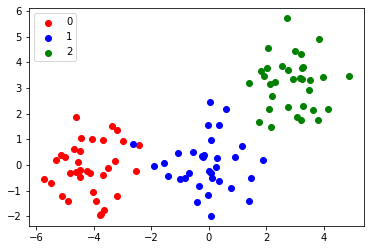

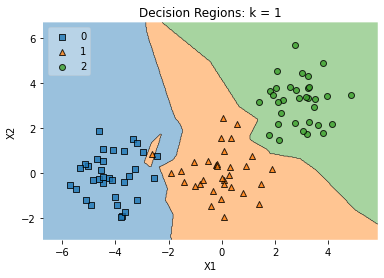

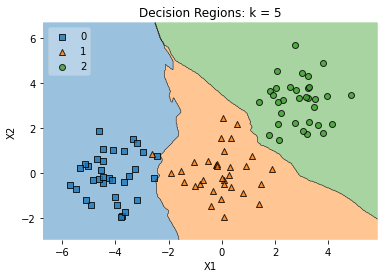

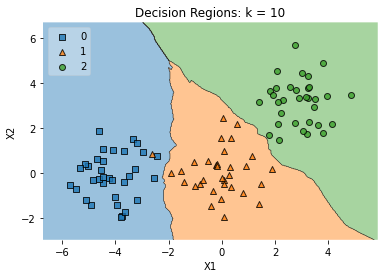

In [40]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
import sklearn.datasets as skdata
from matplotlib import pyplot
from pandas import DataFrame

# Gera os dados em duas dimensões
n_samples = 100 # número de observações
# centro dos grupos
centers = [(-4, 0), (0, 0), (3, 3)]
X, y = skdata.make_blobs(n_samples=100, n_features=2, cluster_std=1.0, centers=centers, 
                         shuffle=False, random_state=42)

# monta a matrix de atributos
d = np.column_stack((X,np.transpose(y)))
# converte para o formato dataframe do Pandas
data = DataFrame(data = d, columns=['X1', 'X2', 'y'])
features_names = ['X1', 'X2']
class_labels = np.unique(y)

# mostra os dados e colori de acordo com as classes
colors = ['red', 'blue', 'green', 'black']
aux = 0
for c in class_labels:
    ind = np.where(y == c)
    plt.scatter(X[ind,0][0], X[ind,1][0], color = colors[aux], label = c)
    aux = aux + 1
plt.legend()
plt.show()

# mostra as regiões de separação para diversos valores de k
vk = [1,5,10]
for k in vk:
    # Training a classifier
    model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    model.fit(X, y)
    # Plotting decision regions
    plot_decision_regions(X, y, clf=model, legend=2)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Decision Regions: k = '+str(k))
    plt.show()

In [ ]:
Para o classificador regressão logística:

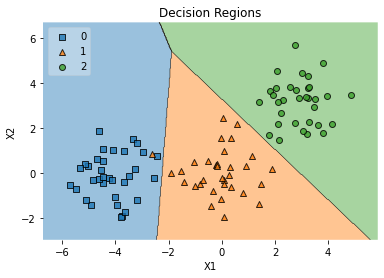

In [20]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

# Training a classifier
model = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
model.fit(X, y)
# Plotting decision regions
plot_decision_regions(X, y, clf=model, legend=2)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Regions')
plt.show()

In [ ]:
Notem que as curvas de separação são retas.

In [ ]:
Para o classificador Naive Bayes:

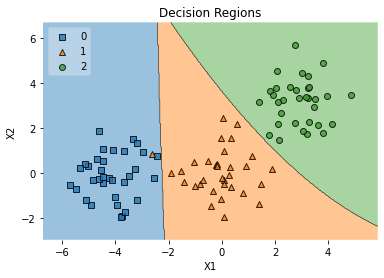

In [21]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB

# Training a classifier
model = GaussianNB()
model.fit(X, y)

# Plotting decision regions
plot_decision_regions(X, y, clf=model, legend=2)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Regions')
plt.show()

In [ ]:
Vejam que os métodos fornecem regiões de decisão diferentes.

In [ ]:
### Exercícios de fixação

In [ ]:
Não é necessário entregar os exercícios abaixo, mas é importante resolvê-los para fixar os conteúdos estudados.

In [ ]:
1 - Repita todos os passos acima para a base de dados BreastCancer.

In [ ]:
2 - Compare os três metodos de classificação para a base vertebralcolumn-3C.

In [ ]:
3 - Faça a classificação dos dados gerados artificialmente com o código abaixo. Gere as regiões de separação para os métodos estudados nessa aula.

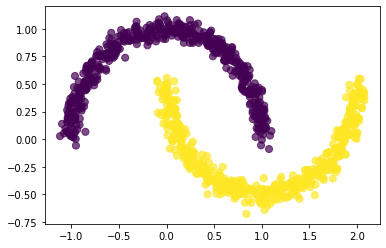

In [30]:
from sklearn import datasets
plt.figure(figsize=(6,4))

n_samples = 1000

data  = datasets.make_moons(n_samples=n_samples, noise=.05)
X = data[0]
y = data[1]

plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.show(True)

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

np.random.seed(42) # define the seed (important to reproduce the results)

data = pd.read_csv('data/vertebralcolumn-2C.csv', header=(0))
data = data.dropna(axis='rows') #remove NaN

data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

from sklearn.model_selection import train_test_split
p = 0.2 # fraction of elements in the test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

In [44]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(f'Accuracy: {model.score(x_test, y_test):.1f}%')

Accuracy: 0.8%


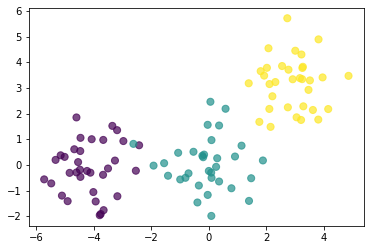

In [45]:
 import sklearn.datasets as skdata

from matplotlib import pyplot

from pandas import DataFrame

from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt


# Gera os dados em duas dimensões

n_samples = 100 # número de observações

# centro dos grupos

centers = [(-4, 0), (0, 0), (3, 3)]

X, y = skdata.make_blobs(n_samples=100, n_features=2, cluster_std=1.0, centers=centers, 

                         shuffle=False, random_state=42)

plt.figure(figsize=(6,4))

plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.7)

plt.show(True)


from sklearn.model_selection import train_test_split

p = 0.2 # fraction of elements in the test set

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model = LogisticRegression(solver = 'lbfgs', max_iter = 1000)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(f'Acurácia: {model.score(x_test, y_test):.2f}%')

Acurácia: 1.00%
